In [1]:
import pandas as pd
import os
import sys
# Add the path to the constants file to the system path
sys.path.append('../../')
from path_utils import *

# source code folder path
rec_sys_dir = get_rec_sys_directory()
print(f"Rec-sys directory: {rec_sys_dir}")

# data folder path
DATA_DIR = os.path.join(rec_sys_dir, 'data')
print(f"Data directory: {DATA_DIR}")

# data path
links_path = os.path.join(DATA_DIR, 'movie-ml-latest-small/links.csv')
print(f'Data path: {links_path}')
movies_path = os.path.join(DATA_DIR, 'movie-ml-latest-small/movies.csv')
print(f'Data path: {movies_path}')
ratings_path = os.path.join(DATA_DIR, 'movie-ml-latest-small/ratings.csv')
print(f'Data path: {ratings_path}')
tags_path = os.path.join(DATA_DIR, 'movie-ml-latest-small/tags.csv')
print(f'Data path: {tags_path}')

data_path = os.path.join(DATA_DIR, 'movie-ml-latest-small/merged_data.csv')
print(f'Data path: {data_path}')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Rec-sys directory: /Users/tnathu-ai/VSCode/recommender-system/recommender-system-openAI/rec-sys
Data directory: /Users/tnathu-ai/VSCode/recommender-system/recommender-system-openAI/rec-sys/data
Data path: /Users/tnathu-ai/VSCode/recommender-system/recommender-system-openAI/rec-sys/data/movie-ml-latest-small/links.csv
Data path: /Users/tnathu-ai/VSCode/recommender-system/recommender-system-openAI/rec-sys/data/movie-ml-latest-small/movies.csv
Data path: /Users/tnathu-ai/VSCode/recommender-system/r

In [2]:
# Load the data into pandas dataframes
links = pd.read_csv(links_path)
movies = pd.read_csv(movies_path)
ratings = pd.read_csv(ratings_path)
tags = pd.read_csv(tags_path)

# Merge the dataframes based on common columns using inner join
merged_data = pd.merge(links, movies, on='movieId')
merged_data = pd.merge(merged_data, ratings, on='movieId')
merged_data = pd.merge(merged_data, tags, on=['movieId', 'userId'])

# If you want to get rid of duplicate or unnecessary columns, do that here
# drop the timestamp columns
merged_data.drop(['timestamp_x', 'timestamp_y'], axis=1, inplace=True)

# filter users with more or equal than 5 ratings
user_counts = merged_data['userId'].value_counts()
merged_data = merged_data[merged_data['userId'].isin(user_counts[user_counts >= 5].index)]


# Save or print the merged data
merged_data.to_csv(data_path, index=False)
merged_data.info()
merged_data.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3405 entries, 0 to 3475
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  3405 non-null   int64  
 1   imdbId   3405 non-null   int64  
 2   tmdbId   3405 non-null   float64
 3   title    3405 non-null   object 
 4   genres   3405 non-null   object 
 5   userId   3405 non-null   int64  
 6   rating   3405 non-null   float64
 7   tag      3405 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 239.4+ KB


,movieId,imdbId,tmdbId,title,genres,userId,rating,tag
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,4.0,pixar
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,4.0,pixar
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,3.5,fun
3,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy,62,4.0,fantasy
4,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy,62,4.0,magic board game


In [5]:
# number of unique users
print(f"\nNumber of unique users: {merged_data['userId'].nunique()}")

# number of unique movies
print(f"\nNumber of unique movies: {merged_data['movieId'].nunique()}")

# number of unique ratings and their values and distribution
print(f"\nNumber of unique ratings: {merged_data['rating'].nunique()}")
print(f"\nUnique ratings: {merged_data['rating'].unique()}")
print(f"\nRatings distribution: {merged_data['rating'].value_counts()}")
print(f"\nRatings distribution: {merged_data['rating'].value_counts(normalize=True)}")



Number of unique users: 25

Number of unique movies: 1451

Number of unique ratings: 10

Unique ratings: [4.  3.5 3.  1.5 2.5 5.  4.5 1.  2.  0.5]

Ratings distribution: 4.0    989
5.0    855
3.5    569
4.5    484
3.0    267
2.0    101
2.5     77
1.0     30
1.5     26
0.5      7
Name: rating, dtype: int64

Ratings distribution: 4.0    0.290455
5.0    0.251101
3.5    0.167107
4.5    0.142144
3.0    0.078414
2.0    0.029662
2.5    0.022614
1.0    0.008811
1.5    0.007636
0.5    0.002056
Name: rating, dtype: float64


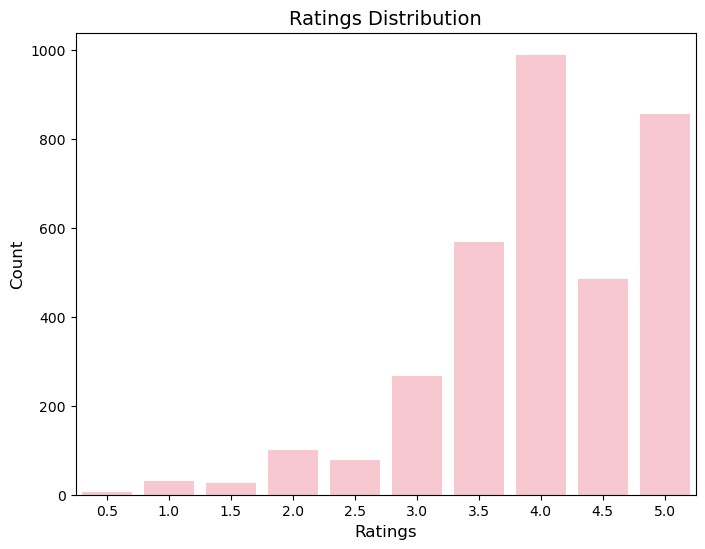

In [4]:
# visualize the ratings distribution in seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=merged_data, color='pink')
plt.title('Ratings Distribution', fontsize=14)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()
